In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("data_clean.csv")
print(data)

     Unnamed: 0  Ozone  Solar.R  Wind Temp C Month  Day  Year  Temp Weather
0             1   41.0    190.0   7.4     67     5    1  2010    67       S
1             2   36.0    118.0   8.0     72     5    2  2010    72       C
2             3   12.0    149.0  12.6     74     5    3  2010    74      PS
3             4   18.0    313.0  11.5     62     5    4  2010    62       S
4             5    NaN      NaN  14.3     56     5    5  2010    56       S
..          ...    ...      ...   ...    ...   ...  ...   ...   ...     ...
153         154   41.0    190.0   7.4     67     5    1  2010    67       C
154         155   30.0    193.0   6.9     70     9   26  2010    70      PS
155         156    NaN    145.0  13.2     77     9   27  2010    77       S
156         157   14.0    191.0  14.3     75     9   28  2010    75       S
157         158   18.0    131.0   8.0     76     9   29  2010    76       C

[158 rows x 10 columns]


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [4]:
print(type(data))
print(data.shape)
print(data.size)

<class 'pandas.core.frame.DataFrame'>
(158, 10)
1580


In [5]:
data1 = data.drop(['Unnamed: 0',"Temp C"], axis =1)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5,1,2010,67,S
1,36.0,118.0,8.0,5,2,2010,72,C
2,12.0,149.0,12.6,5,3,2010,74,PS
3,18.0,313.0,11.5,5,4,2010,62,S
4,NaN,NaN,14.3,5,5,2010,56,S
...,...,...,...,...,...,...,...,...
153,41.0,190.0,7.4,5,1,2010,67,C
154,30.0,193.0,6.9,9,26,2010,70,PS
155,NaN,145.0,13.2,9,27,2010,77,S
156,14.0,191.0,14.3,9,28,2010,75,S


In [6]:
data1['Month']=pd.to_numeric(data['Month'],errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  158 non-null    int64  
 1   Ozone       120 non-null    float64
 2   Solar.R     151 non-null    float64
 3   Wind        158 non-null    float64
 4   Temp C      158 non-null    object 
 5   Month       158 non-null    object 
 6   Day         158 non-null    int64  
 7   Year        158 non-null    int64  
 8   Temp        158 non-null    int64  
 9   Weather     155 non-null    object 
dtypes: float64(3), int64(4), object(3)
memory usage: 12.5+ KB


In [7]:
data1.drop_duplicates(keep='first', inplace = True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


In [8]:
data1.rename({'solar.R': 'Solar'}, axis=1, inplace = True)
data1

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Weather
0,41.0,190.0,7.4,5.0,1,2010,67,S
1,36.0,118.0,8.0,5.0,2,2010,72,C
2,12.0,149.0,12.6,5.0,3,2010,74,PS
3,18.0,313.0,11.5,5.0,4,2010,62,S
4,NaN,NaN,14.3,5.0,5,2010,56,S
...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,S
153,41.0,190.0,7.4,5.0,1,2010,67,C
154,30.0,193.0,6.9,9.0,26,2010,70,PS
155,NaN,145.0,13.2,9.0,27,2010,77,S


#### Impute the missing values

In [9]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157 entries, 0 to 157
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ozone    119 non-null    float64
 1   Solar.R  150 non-null    float64
 2   Wind     157 non-null    float64
 3   Month    156 non-null    float64
 4   Day      157 non-null    int64  
 5   Year     157 non-null    int64  
 6   Temp     157 non-null    int64  
 7   Weather  154 non-null    object 
dtypes: float64(4), int64(3), object(1)
memory usage: 11.0+ KB


In [10]:
data1.isnull().sum()

Ozone      38
Solar.R     7
Wind        0
Month       1
Day         0
Year        0
Temp        0
Weather     3
dtype: int64

<Axes: >

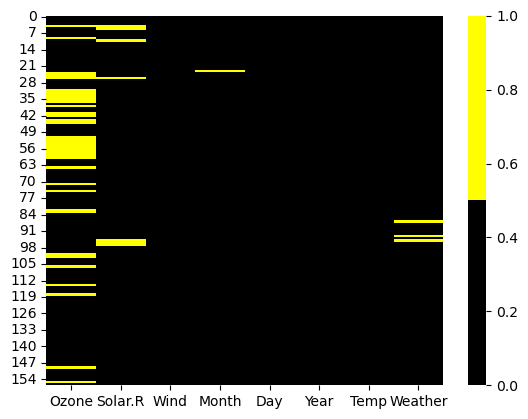

In [11]:
cols = data1.columns
colors = ['black', 'yellow']
sns.heatmap(data1[cols].isnull(),cmap=sns.color_palette(colors),cbar = True)

In [12]:
median_ozone = data1["Ozone"].median()
mean_ozone = data1["Ozone"].mean()
print("Median of Ozone: ", median_ozone)
print("Mean of Ozone: ", mean_ozone)

Median of Ozone:  31.0
Mean of Ozone:  41.81512605042017


In [13]:
data1['Ozone'] = data1['Ozone'].fillna(median_ozone)
data1.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
dtype: int64

In [14]:
mean_solar = data1["Solar.R"].mean()
print("Mean of Solar.R: ", mean_solar)

Mean of Solar.R:  185.36666666666667


In [15]:
data1['Solar'] = data1['Solar.R'].fillna(mean_solar)
data1.isnull().sum()

Ozone      0
Solar.R    7
Wind       0
Month      1
Day        0
Year       0
Temp       0
Weather    3
Solar      0
dtype: int64

In [18]:
data1_numeric = data1.iloc[:,[0,1,2,6]]
data1_numeric

,Ozone,Solar.R,Wind,Temp
0,41.0,190.0,7.4,67
1,36.0,118.0,8.0,72
2,12.0,149.0,12.6,74
3,18.0,313.0,11.5,62
4,31.0,NaN,14.3,56
...,...,...,...,...
152,20.0,223.0,11.5,68
153,41.0,190.0,7.4,67
154,30.0,193.0,6.9,70
155,31.0,145.0,13.2,77


In [19]:
data1_numeric.corr()

,Ozone,Solar.R,Wind,Temp
Ozone,1.000000,0.301821,-0.523738,0.597087
Solar.R,0.301821,1.000000,-0.057407,0.273558
Wind,-0.523738,-0.057407,1.000000,-0.441228
Temp,0.597087,0.273558,-0.441228,1.000000


In [ ]:
#### Observations
- The highest correlation strength is observed between ozone and temperature(0.597087)
- The next highest correlation strength is observed between ozone and wind(-0.523738)
- The next highest correlation strength is observed between wind and temperature(-0.441228)

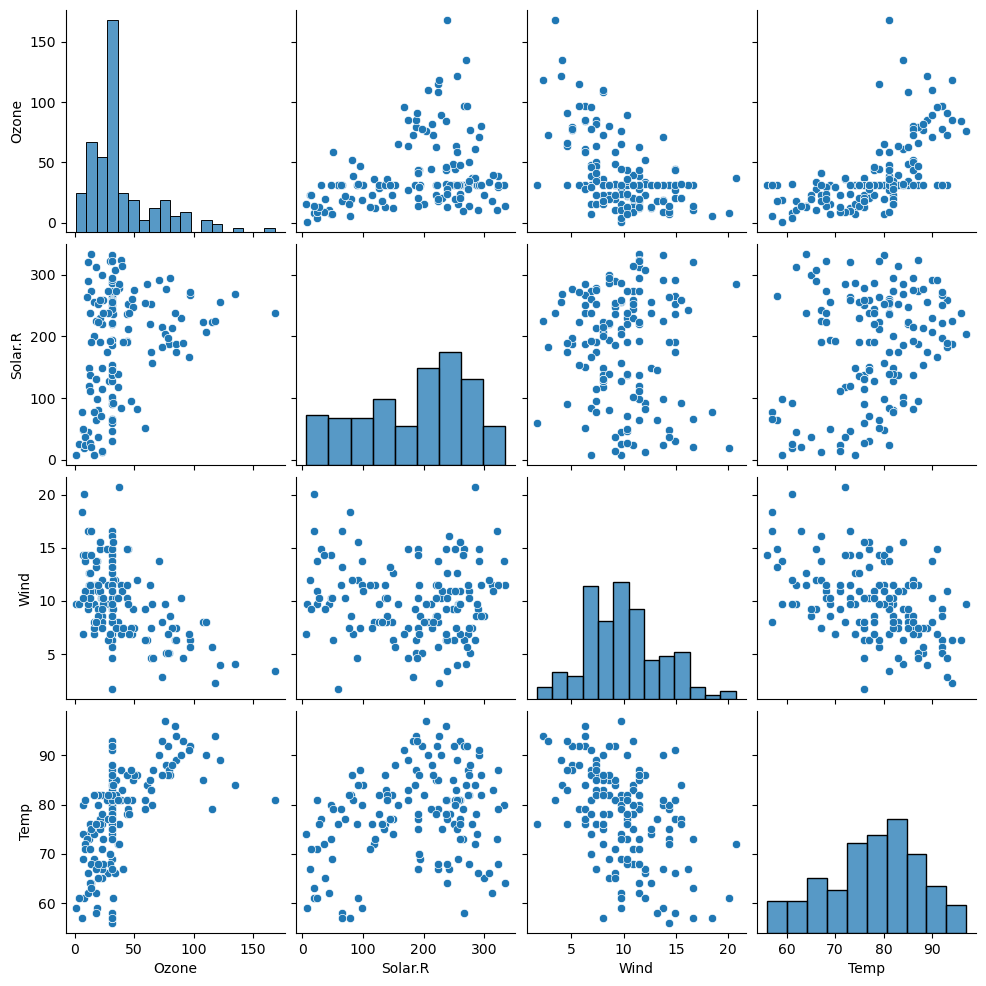

In [21]:
sns.pairplot(data1_numeric)

#### Transformations

In [22]:
data2=pd.get_dummies(data1,columns=['Month','Weather'])
data2

,Ozone,Solar.R,Wind,Day,Year,Temp,Solar,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7.4,1,2010,67,190.000000,True,False,False,False,False,False,False,True
1,36.0,118.0,8.0,2,2010,72,118.000000,True,False,False,False,False,True,False,False
2,12.0,149.0,12.6,3,2010,74,149.000000,True,False,False,False,False,False,True,False
3,18.0,313.0,11.5,4,2010,62,313.000000,True,False,False,False,False,False,False,True
4,31.0,NaN,14.3,5,2010,56,185.366667,True,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,30,2010,68,223.000000,False,False,False,False,True,False,False,True
153,41.0,190.0,7.4,1,2010,67,190.000000,True,False,False,False,False,True,False,False
154,30.0,193.0,6.9,26,2010,70,193.000000,False,False,False,False,True,False,True,False
155,31.0,145.0,13.2,27,2010,77,145.000000,False,False,False,False,True,False,False,True


In [23]:
data2=pd.get_dummies(data1,columns=['Weather'])
data2

,Ozone,Solar.R,Wind,Month,Day,Year,Temp,Solar,Weather_C,Weather_PS,Weather_S
0,41.0,190.0,7.4,5.0,1,2010,67,190.000000,False,False,True
1,36.0,118.0,8.0,5.0,2,2010,72,118.000000,True,False,False
2,12.0,149.0,12.6,5.0,3,2010,74,149.000000,False,True,False
3,18.0,313.0,11.5,5.0,4,2010,62,313.000000,False,False,True
4,31.0,NaN,14.3,5.0,5,2010,56,185.366667,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,9.0,30,2010,68,223.000000,False,False,True
153,41.0,190.0,7.4,5.0,1,2010,67,190.000000,True,False,False
154,30.0,193.0,6.9,9.0,26,2010,70,193.000000,False,True,False
155,31.0,145.0,13.2,9.0,27,2010,77,145.000000,False,False,True


In [24]:
data2=pd.get_dummies(data1,columns=['Month'])
data2

,Ozone,Solar.R,Wind,Day,Year,Temp,Weather,Solar,Month_5.0,Month_6.0,Month_7.0,Month_8.0,Month_9.0
0,41.0,190.0,7.4,1,2010,67,S,190.000000,True,False,False,False,False
1,36.0,118.0,8.0,2,2010,72,C,118.000000,True,False,False,False,False
2,12.0,149.0,12.6,3,2010,74,PS,149.000000,True,False,False,False,False
3,18.0,313.0,11.5,4,2010,62,S,313.000000,True,False,False,False,False
4,31.0,NaN,14.3,5,2010,56,S,185.366667,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,20.0,223.0,11.5,30,2010,68,S,223.000000,False,False,False,False,True
153,41.0,190.0,7.4,1,2010,67,C,190.000000,True,False,False,False,False
154,30.0,193.0,6.9,26,2010,70,PS,193.000000,False,False,False,False,True
155,31.0,145.0,13.2,27,2010,77,S,145.000000,False,False,False,False,True


In [25]:
data1_numeric.values

array([[ 41. , 190. ,   7.4,  67. ],
       [ 36. , 118. ,   8. ,  72. ],
       [ 12. , 149. ,  12.6,  74. ],
       [ 18. , 313. ,  11.5,  62. ],
       [ 31. ,   nan,  14.3,  56. ],
       [ 28. ,   nan,  14.9,  66. ],
       [ 23. , 299. ,   8.6,  65. ],
       [ 19. ,  99. ,  13.8,  59. ],
       [  8. ,  19. ,  20.1,  61. ],
       [ 31. , 194. ,   8.6,  69. ],
       [  7. ,   nan,   6.9,  74. ],
       [ 16. , 256. ,   9.7,  69. ],
       [ 11. , 290. ,   9.2,  66. ],
       [ 14. , 274. ,  10.9,  68. ],
       [ 18. ,  65. ,  13.2,  58. ],
       [ 14. , 334. ,  11.5,  64. ],
       [ 34. , 307. ,  12. ,  66. ],
       [  6. ,  78. ,  18.4,  57. ],
       [ 30. , 322. ,  11.5,  68. ],
       [ 11. ,  44. ,   9.7,  62. ],
       [  1. ,   8. ,   9.7,  59. ],
       [ 11. , 320. ,  16.6,  73. ],
       [  4. ,  25. ,   9.7,  61. ],
       [ 32. ,  92. ,  12. ,  61. ],
       [ 31. ,  66. ,  16.6,  57. ],
       [ 31. , 266. ,  14.9,  58. ],
       [ 31. ,   nan,   8. ,  57. ],
 

In [26]:
from numpy import set_printoptions
from sklearn.preprocessing import MinMaxScaler
array = data1_numeric.values
scaler = MinMaxScaler(feature_range=(0,1))
rescaledX = scaler.fit_transform(array)
set_printoptions(precision=2)
print(rescaledX[0:10,:])

[[0.24 0.56 0.3  0.27]
 [0.21 0.34 0.33 0.39]
 [0.07 0.43 0.57 0.44]
 [0.1  0.94 0.52 0.15]
 [0.18  nan 0.66 0.  ]
 [0.16  nan 0.69 0.24]
 [0.13 0.89 0.36 0.22]
 [0.11 0.28 0.64 0.07]
 [0.04 0.04 0.97 0.12]
 [0.18 0.57 0.36 0.32]]
